In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np # linear algebra

In [2]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

In [3]:
data = arff.loadarff(r"dataset/EEG Eye State.arff")
df = pd.DataFrame(data[0])
print(df)

           AF3       F7       F3      FC5       T7       P7       O1       O2  \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            P8       T8    

## Cleaning

In [ ]:
#в оригинальной статье образцы [899, 10387, 11510, 13180] были обнаружены как выбросы в наборе данных 
df.iloc[[898,899,900,10386,10387,10388,11509,11510,11511,13179,13180,13181]]

In [5]:
index_del = [898, 10386, 11509, 13179]
df = df.drop(labels=index_del, axis=0)

In [7]:
y_ = np.array(df.iloc[:,-1])
data_y = []
for i in y_:
    if i==b'0':
        i = 0
    else:
        i=1
    data_y.append(i)
data_y = np.array(data_y)

In [8]:
data_x = np.array(df.iloc[:,:-1])

In [9]:

# train and test split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(11980, 14) (11980,) (2996, 14) (2996,)


## Normalization 
(All data - mean)/standart deviation 

In [10]:
# Data Normalisation
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

train_x_norm = minmax_scaler(train_x)
print(train_x_norm)

[[0.07202352 0.24080707 0.16029887 ... 0.24869832 0.25399515 0.20362262]
 [0.36015025 0.38367558 0.33151396 ... 0.39004594 0.45454782 0.42677255]
 [0.30821493 0.41224928 0.35599597 ... 0.40837162 0.40240882 0.37656722]
 ...
 [0.43047526 0.32246896 0.45652059 ... 0.50260337 0.47725436 0.49373113]
 [0.22779683 0.47552531 0.30432939 ... 0.34818785 0.2780573  0.29149555]
 [0.22446513 0.29389526 0.16845954 ... 0.24083716 0.34891421 0.32636188]]


#### Метод главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. 
Вычисление главных компонент может быть сведено к вычислению сингулярного разложения матрицы данных[⇨] или к вычислению собственных векторов и собственных значений ковариационной матрицы исходных данных

In [9]:
import numpy as np
from sklearn.decomposition import PCA

In [11]:
from sklearn.decomposition import PCA
pca_eeg = PCA(n_components=2)
principalComponents_eeg = pca_eeg.fit_transform(train_x_norm)

In [12]:
principal_eeg_Df = pd.DataFrame(data = 10.*principalComponents_eeg
             , columns = ['principal component 1', 'principal component 2'])

In [13]:
principal_eeg_Df.tail()

,principal component 1,principal component 2
11975,0.021086,1.606994
11976,0.477832,1.309220
11977,1.482241,0.539497
11978,-0.703691,-1.640077
11979,-3.491530,-0.898498


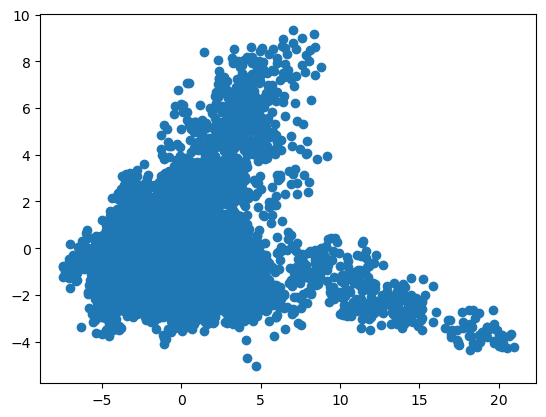

In [14]:
# plot
fig, ax = plt.subplots()

ax.scatter(principal_eeg_Df.iloc[:,0], principal_eeg_Df.iloc[:,1])
plt.show()

In [143]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array(df.iloc[:,:14]).T#data_matrix
pca = PCA(n_components=14)
pca.fit(X)
PCX = pca.components_

In [80]:
# Helper functions

# Data Normalisation
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [81]:
# hyperparameters
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(7.5*10e3)

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [ ]:
# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

In [83]:
# collecting labels

label_data = train_y
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

sample data:  1000
sample data:  2000
sample data:  3000
sample data:  4000
sample data:  5000
sample data:  6000
sample data:  7000
sample data:  8000
sample data:  9000
sample data:  10000
sample data:  11000


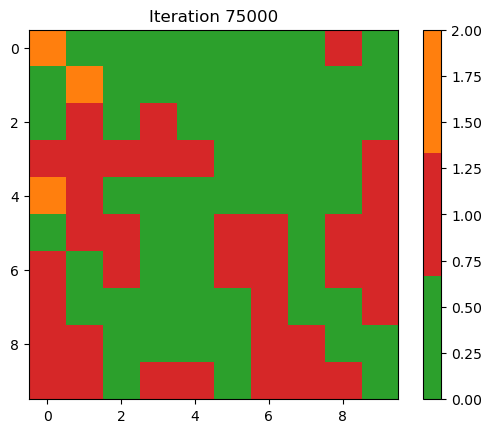

In [84]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [85]:
# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data = minmax_scaler(test_x) # normalisation

winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(test_y, np.array(winner_labels)))

Accuracy:  0.45427236315086783


# Train SOM

In [16]:
from minisom import MiniSom
import matplotlib.pyplot as plt
%matplotlib inline

data = np.array(principal_eeg_Df)#100.*train_x_norm

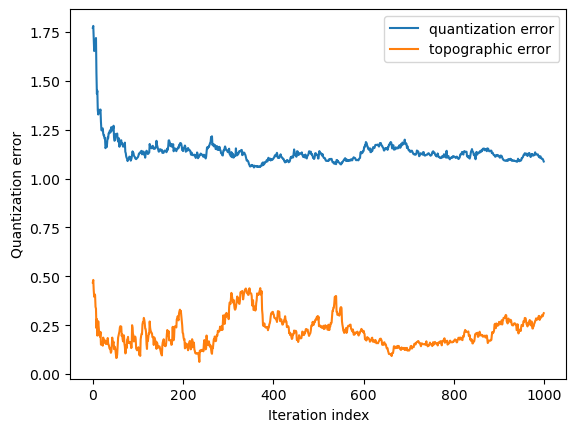

In [31]:
# I use linear som topography
som_shape = (4, 2)

som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.5, learning_rate=0.5)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

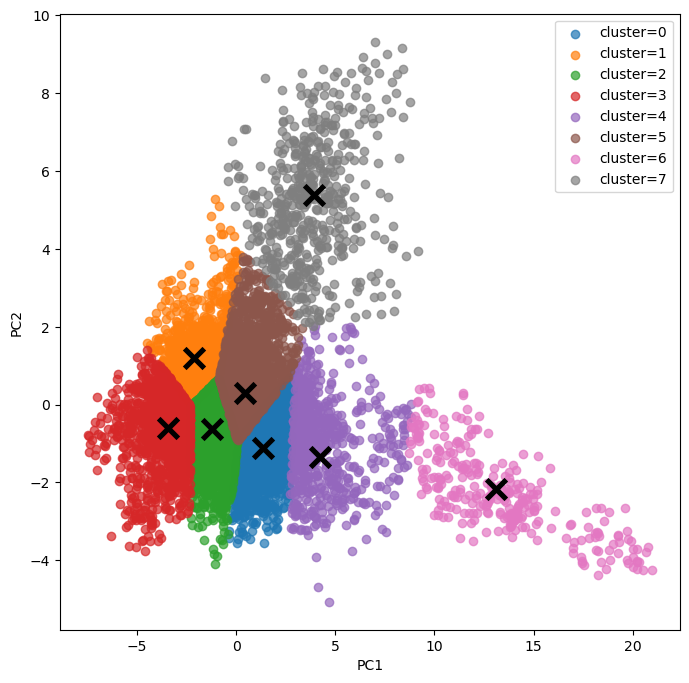

In [33]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(8,8))

for c in np.unique(cluster_index):
    plt.scatter(principal_eeg_Df.iloc[cluster_index == c, 0],
                principal_eeg_Df.iloc[cluster_index == c, 1], label='cluster='+str(c), alpha=0.7)

# Plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=7, linewidths=20, color='k') # label='centroid'
    
#plt.title("Clusters of Customers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()